<a href="https://colab.research.google.com/github/Shaurya016/Celebal-Project/blob/main/MainProjectFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Install required libraries
!pip install -q seaborn joblib

In [2]:
# 📚 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# 📥 Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age",
    "OtherInstallmentPlans", "Housing", "ExistingCredits",
    "Job", "NumPeopleMaintenance", "Telephone", "ForeignWorker", "Target"
]
df = pd.read_csv(url, delimiter=' ', header=None, names=columns)

# 🔍 Preview the data
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1000, 21)


,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,NumPeopleMaintenance,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


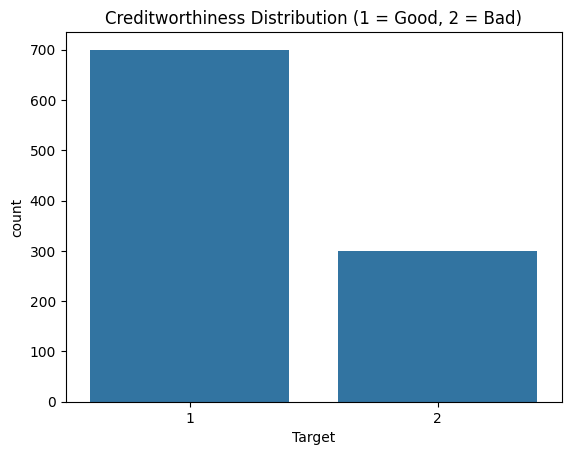

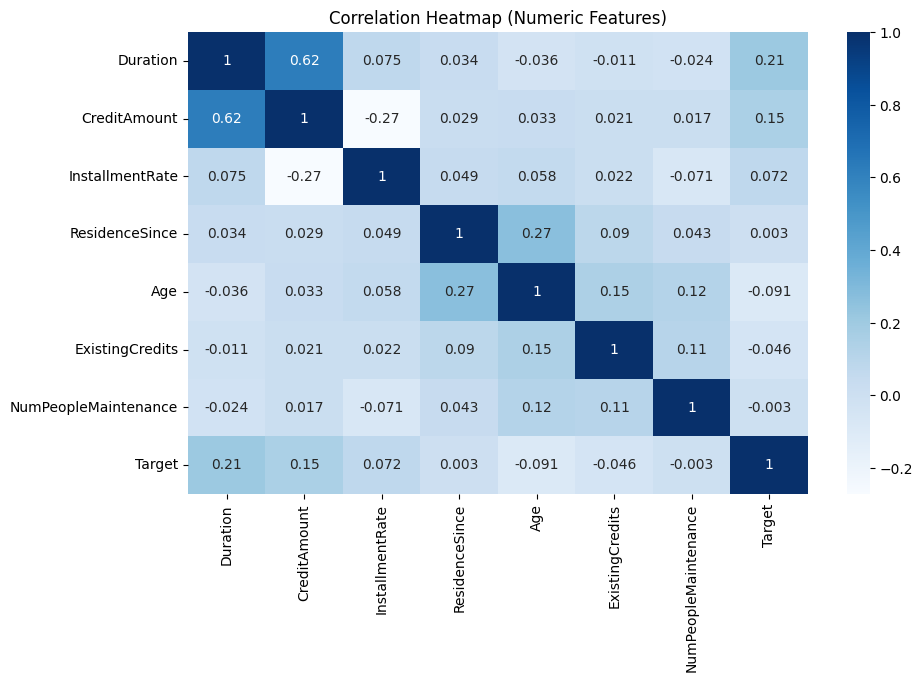

In [3]:
# 📊 Target distribution
sns.countplot(data=df, x='Target')
plt.title("Creditworthiness Distribution (1 = Good, 2 = Bad)")
plt.show()

# 📊 Correlation heatmap (for numeric columns)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [4]:
# 🔁 Encode categorical features
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# 🎯 Separate features and target
X = df.drop('Target', axis=1)
y = df['Target'].apply(lambda x: 1 if x == 1 else 0)  # 1 = good, 0 = bad

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 🚀 Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🎯 Predict
y_pred = rf.predict(X_test)

# 📈 Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")


Model Accuracy: 0.81


In [17]:
# 🧾 Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.54      0.58        59
           1       0.82      0.86      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



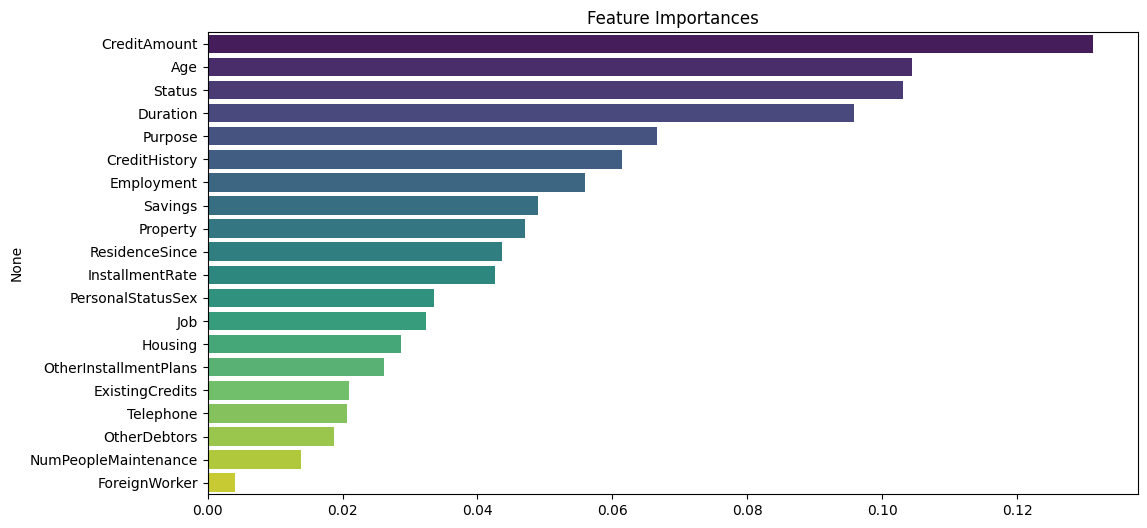

In [22]:
# 🌟 Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importances")
plt.show()


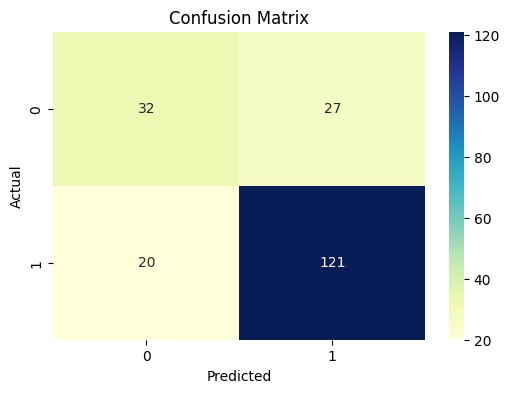

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


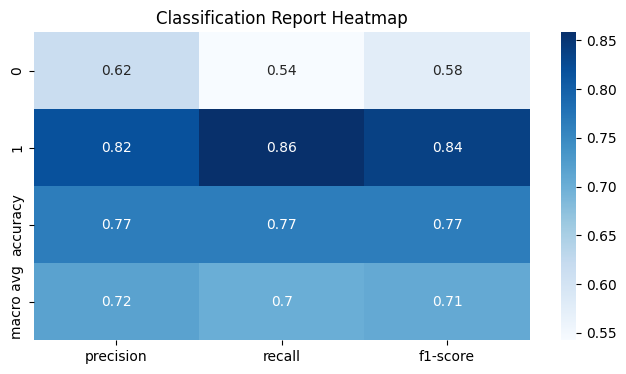

In [18]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title("Classification Report Heatmap")
plt.show()


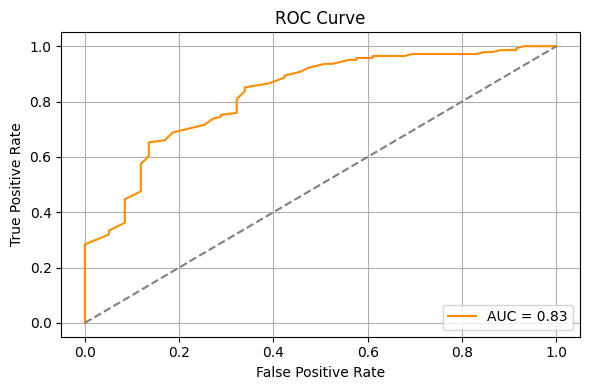

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


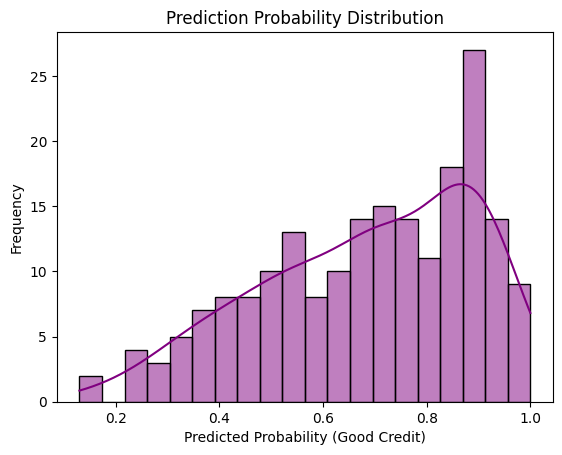

In [24]:
sns.histplot(y_probs, bins=20, kde=True, color='purple')
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability (Good Credit)")
plt.ylabel("Frequency")
plt.show()


In [25]:
# 💾 Save the model
joblib.dump(rf, "random_forest_credit_model.joblib")

from google.colab import files
files.download("random_forest_credit_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>